In [101]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset.csv")

In [102]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [104]:
def PolynomialLogisticRegression():
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('log_reg', LogisticRegression(solver='liblinear'))
    ])

In [105]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

In [106]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [114]:
classifier1 = PolynomialLogisticRegression()
classifier1.poly__degree=1
classifier1.fit(xtrain, ytrain)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [118]:
y_pred1 = classifier1.predict(xtest)

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix: \n", cm)
print( "AUC Score: %f" % metrics.roc_auc_score(ytest, y_pred1))

Confusion Matrix: 
 [[221 229]
 [171 171]]
AUC Score: 0.783977


In [120]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.494949494949495


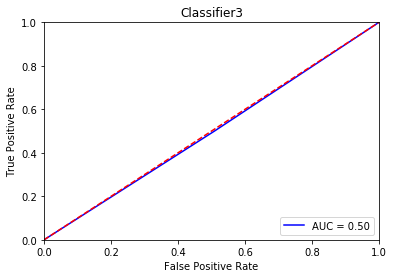

In [128]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
PolynomialLogisticRegression().get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'std_scaler', 'poly', 'log_reg', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'log_reg__C', 'log_reg__class_weight', 'log_reg__dual', 'log_reg__fit_intercept', 'log_reg__intercept_scaling', 'log_reg__l1_ratio', 'log_reg__max_iter', 'log_reg__multi_class', 'log_reg__n_jobs', 'log_reg__penalty', 'log_reg__random_state', 'log_reg__solver', 'log_reg__tol', 'log_reg__verbose', 'log_reg__warm_start'])

In [112]:
from sklearn.model_selection import GridSearchCV
grid_param1={'log_reg__penalty':['l1','l2'],'log_reg__C':[100,10,1,0.1,0.01],'poly__degree':[1,2]}
classifier2=PolynomialLogisticRegression()
grid_clf1=GridSearchCV(classifier2,grid_param1,cv=5,verbose=2)
grid_clf1.fit(x,y)
print(grid_clf1.best_score_)
print(grid_clf1.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=2 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=2, total=  11.0s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=2, total=   9.9s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=2, total=  14.6s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=2, total=  17.3s
[CV] log_reg__C=100, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=100, log_reg__penalty=l1, poly__degree=2, total=  10.8s
[CV] log_reg__C=100, log_reg__penalty=l2, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l2, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l2, poly__degree=1 .............
[CV]  log_reg__C=100, log_reg__penalty=l2, poly__degree=1, total=   0.0s
[CV] log_reg__C=100, log_reg__penalty=l2, poly__degree=1 ......

[CV]  log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2, total=   0.2s
[CV] log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2, total=   0.1s
[CV] log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2, total=   0.2s
[CV] log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2, total=   0.2s
[CV] log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l1, poly__degree=2, total=   0.2s
[CV] log_reg__C=0.1, log_reg__penalty=l2, poly__degree=1 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l2, poly__degree=1, total=   0.0s
[CV] log_reg__C=0.1, log_reg__penalty=l2, poly__degree=1 .............
[CV]  log_reg__C=0.1, log_reg__penalty=l2, poly__degree=1, total=   0.0s
[CV] log_reg__C=0.1, log_reg__penalty=l2, poly__degree=1 ......

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


In [122]:
classifier3=PolynomialLogisticRegression()
classifier3.poly__degree=1
classifier3.log_reg__C=100
classifier3.log_reg__penalty='l1'
classifier3.fit(xtrain,ytrain)
y_pred3=classifier3.predict(xtest)
cm3 = confusion_matrix(ytest, y_pred3)
print ("Confusion Matrix: \n", cm3)
print('Accuracy:',accuracy_score(ytest,y_pred3))

Confusion Matrix: 
 [[349 101]
 [ 71 271]]
Accuracy: 0.7828282828282829


In [126]:
print( "AUC Score: %f" % metrics.roc_auc_score(ytest, y_pred3))

AUC Score: 0.783977


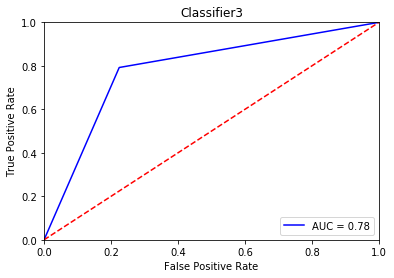

In [127]:

fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred3)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier3')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()